In [1]:
import scanpy as sc
import os,sys,glob
import pandas as pd
import numpy as np
import anndata as ad
import matplotlib.pyplot as plt

import seaborn as sns
from matplotlib.colors import ListedColormap

## Data preparation.

In [2]:
adata = sc.read("/data2/scData/Input_230330_adata_outer_minGenes_50.h5ad")

In [3]:
adata1 = sc.read("/data2/scData/Output_230331_scVI_hgv_5000_outer_minGenes_50.h5ad")

In [4]:
adata.obs = adata1.obs

In [5]:
adata.obsm = adata1.obsm

In [6]:
adata.X

<1918696x49133 sparse matrix of type '<class 'numpy.float32'>'
	with 5493307174 stored elements in Compressed Sparse Row format>

In [7]:
adata.layers["counts"] = adata.X.copy()

In [8]:
sc.pp.normalize_total(adata)
sc.pp.log1p(adata)
adata.layers["logcounts"] = adata.X.copy()

In [9]:
adata.raw = adata

In [10]:
adata.layers["scaled"] = sc.pp.scale(adata, copy = True).X

In [11]:
adata.layers

Layers with keys: counts, logcounts

In [15]:
new_cluster_names = [
    'Oligo OPALIN (C0)', 
    'Exc L2-3 LINC00507 KCNIP4 (C1)', 
    'Neural crest (C2)',
    'Exc LINC01210 (Fetal) (C3)',
    'Exc L2-3 SATB2 (Fetal) (C4)',
    'Astro FGFR3 (C5)',
    'Neural crest (C6)',
    'Exc DLX5 (Fetal) (C7)',
    'Inh RXRG (Fetal) (C8)', 
    'Inh VIP CHRNA2 (C9)',
    'Exc L5-6 NEUROD6 (Fetal) (C10)',
    'Exc L5-6 RORB ARSJ (C11)',
    'Granule neuron (C12)',
    'Exc L4 RORB TSHZ2 (C13)',
    'Astro (Fetal) (C14)',
    'OPC PDGFRA (C15)',
    'Micro TYROBP (C16)',
    'Neural crest (C17)',
    'Inh PVALB NXPH1 (C18)', 
    'Inh SST GRIK1 (C19)',
    'Exc L5-6 HS3ST4 (Fetal) (C20)',
    'Exc L2-3 EEF1A1 (Fetal) (C21)',
    'Neural crest (C22)',
    'Purkinje neuron (C23)',
    'Exc L2-3 RORB COL5A2 (C24)',
    'Exc L5-6 FEZF2 SEMA3E (C25)',
    'Exc SKOR2 (Fetal) (C26)',
    'Exc L5-6 GNG8 (Fetal) (C27)',
    'Exc L2-6 THEMIS KCNIP4 (C28)',
    'Endo NOSTRIN (C29)',
    'Inh LAMP5 CPLX3 (C30)', 
    'Exc ARHGAP11B (Fetal) (C31)',
    'Exc MTRNR2L6 (Fetal) (C32)',
    'Exc L2-4 LIMS2 (Neonatal) (C33)',
    'Astro FGFR3 (C34)',
    'Neural crest (C35)',
    'Exc L5-6 FEZF2 HTR2C (C36)',
    'Neural crest (C37)',
    'Inh PVALB COL15A1 (C38)',
    'Exc L5-6 THEMIS POSTN (C39)',
    'Neuroblast (C40)',
    'Micro TYROBP (C41)',
    'Erythrocyte (C42)',
    'OPC PDGFRA (C43)',
    'Exc L5-6 FEZF2 ERG (C44)',
    'Exc L5-6 SLC17A7 CSN1S1 (C45)',
    'Oligo OPALIN (C46)',
    ]

In [ ]:
 adata.rename_categories('leiden', new_cluster_names)

In [17]:
 categories = [
    "Exc SKOR2 (Fetal) (C26)", 
    "Exc L5-6 NEUROD6 (Fetal) (C10)", 
    "Exc DLX5 (Fetal) (C7)", 
    "Exc LINC01210 (Fetal) (C3)", 
    "Exc L5-6 GNG8 (Fetal) (C27)", 
    "Exc L2-3 EEF1A1 (Fetal) (C21)", 
    "Exc L2-3 SATB2 (Fetal) (C4)", 
    "Exc L5-6 HS3ST4 (Fetal) (C20)", 
    "Exc ARHGAP11B (Fetal) (C31)", 
    "Exc MTRNR2L6 (Fetal) (C32)", 
    "Exc L2-4 LIMS2 (Neonatal) (C33)",
    "Exc L2-3 LINC00507 KCNIP4 (C1)", 
    "Exc L5-6 RORB ARSJ (C11)", 
    "Exc L4 RORB TSHZ2 (C13)", 
    "Exc L2-3 RORB COL5A2 (C24)", 
    "Exc L5-6 FEZF2 SEMA3E (C25)", 
    "Exc L2-6 THEMIS KCNIP4 (C28)", 
    "Exc L5-6 FEZF2 HTR2C (C36)", 
    "Exc L5-6 THEMIS POSTN (C39)", 
    "Exc L5-6 FEZF2 ERG (C44)", 
    "Exc L5-6 SLC17A7 CSN1S1 (C45)",
    "Neural crest (C6)", 
    "Neural crest (C37)", 
    "Neural crest (C2)", 
    "Neural crest (C17)", 
    "Neural crest (C22)", 
    "Neural crest (C35)",
    "Inh RXRG (Fetal) (C8)", 
    "Inh VIP CHRNA2 (C9)", 
    "Inh PVALB NXPH1 (C18)", 
    "Inh SST GRIK1 (C19)", 
    "Inh LAMP5 CPLX3 (C30)", 
    "Inh PVALB COL15A1 (C38)", 
    "Astro (Fetal) (C14)", 
    "Astro FGFR3 (C34)", 
    "Astro FGFR3 (C5)",
    "Oligo OPALIN (C46)",
    "Oligo OPALIN (C0)",
    "OPC PDGFRA (C43)", 
    "OPC PDGFRA (C15)",
    "Micro TYROBP (C41)", 
    "Micro TYROBP (C16)",
    "Erythrocyte (C42)", 
    "Endo NOSTRIN (C29)",
    "Granule neuron (C12)",
    "Purkinje neuron (C23)",
    "Neuroblast (C40)"
    ]

## Hodge2019 Main Markers

In [12]:
#adata = sc.read('/home/ssun1116/Output_230701_SYK_sampling.h5ad')

In [13]:
marker_genes_dict = {
	'Inh1': ['GAD1', 'ADARB2', 'PAX6', 'LAMP5'], 
	'Inh2': ['VIP'], 
	'Inh3': ['LHX6', 'SST'], 
	'Inh4': ['PVALB'],
    'Exc': ['SLC17A7', 'LINC00507', 'RORB', 'THEMIS', 'FEZF2'],
    'Non': ['SLC1A3', 'PDGFRA', 'FGFR3', 'OPALIN', 'NOSTRIN', 'TYROBP'],
}

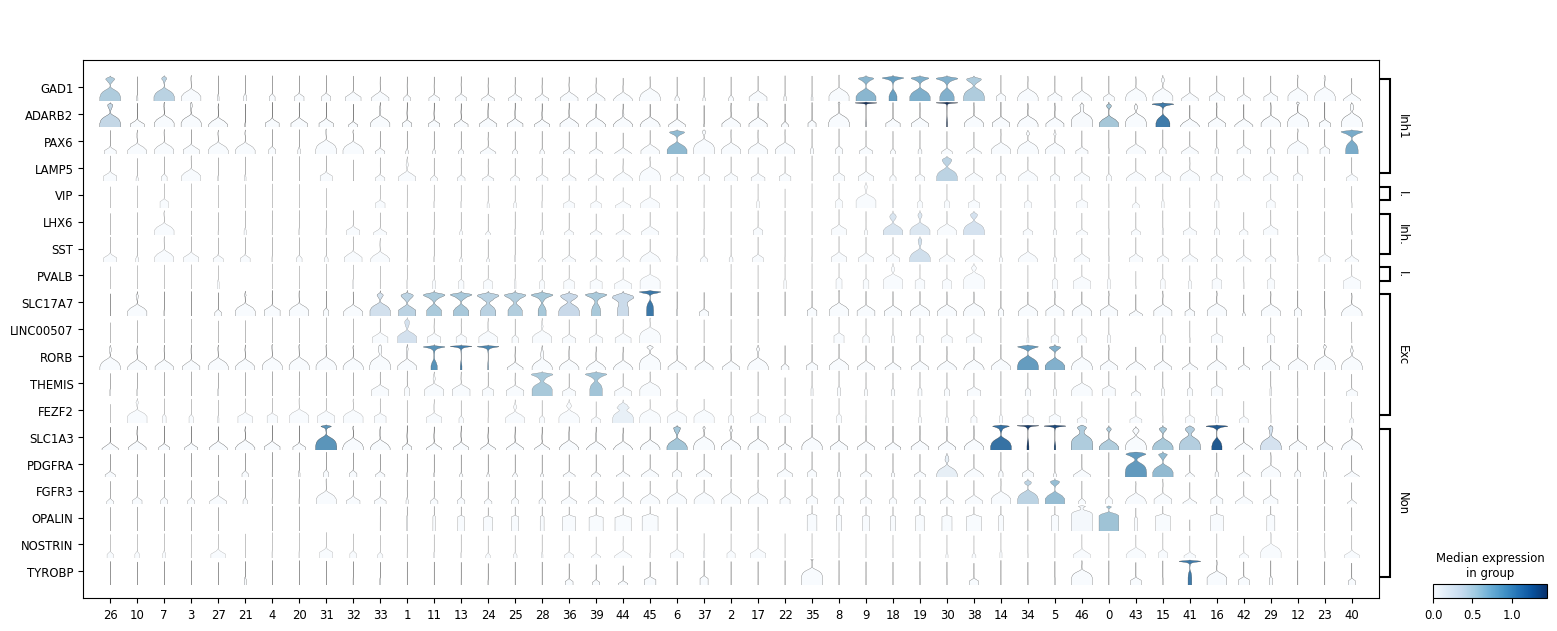

In [14]:
ax = sc.pl.stacked_violin(adata, marker_genes_dict, 
                          groupby='leiden', swap_axes= True, log = True,
                          categories_order = ["26", "10", "7", "3", "27", "21", "4", "20", "31", "32", "33",
                                              "1", "11", "13", "24", "25", "28", "36", "39", "44", "45",
                                              "6", "37", "2", "17", "22", "35",
                                              "8", "9", "18", "19", "30", "38", 
                                              "14", "34", "5",
                                              "46", "0",
                                              "43", "15",
                                              "41", "16",
                                              "42", "29",
                                              "12",
                                              "23",
                                              "40"
                                             ])

         Falling back to preprocessing with `sc.pp.pca` and default params.
categories: 0, 1, 2, etc.
var_group_labels: Inh1, Inh2, Inh3, etc.


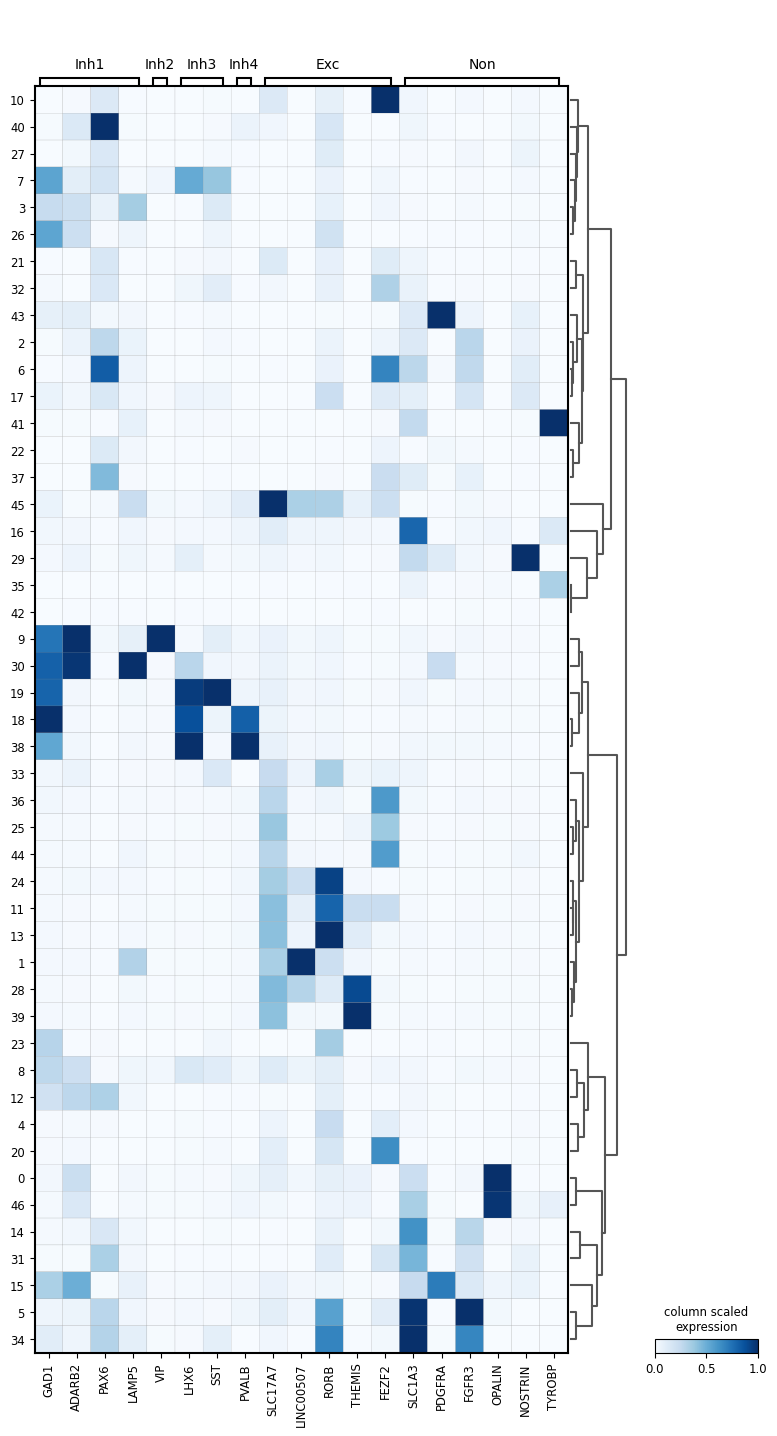

In [15]:
sc.pl.matrixplot(adata, marker_genes_dict, groupby='leiden', dendrogram=True, cmap='Blues', standard_scale='var', colorbar_title='column scaled\nexpression')

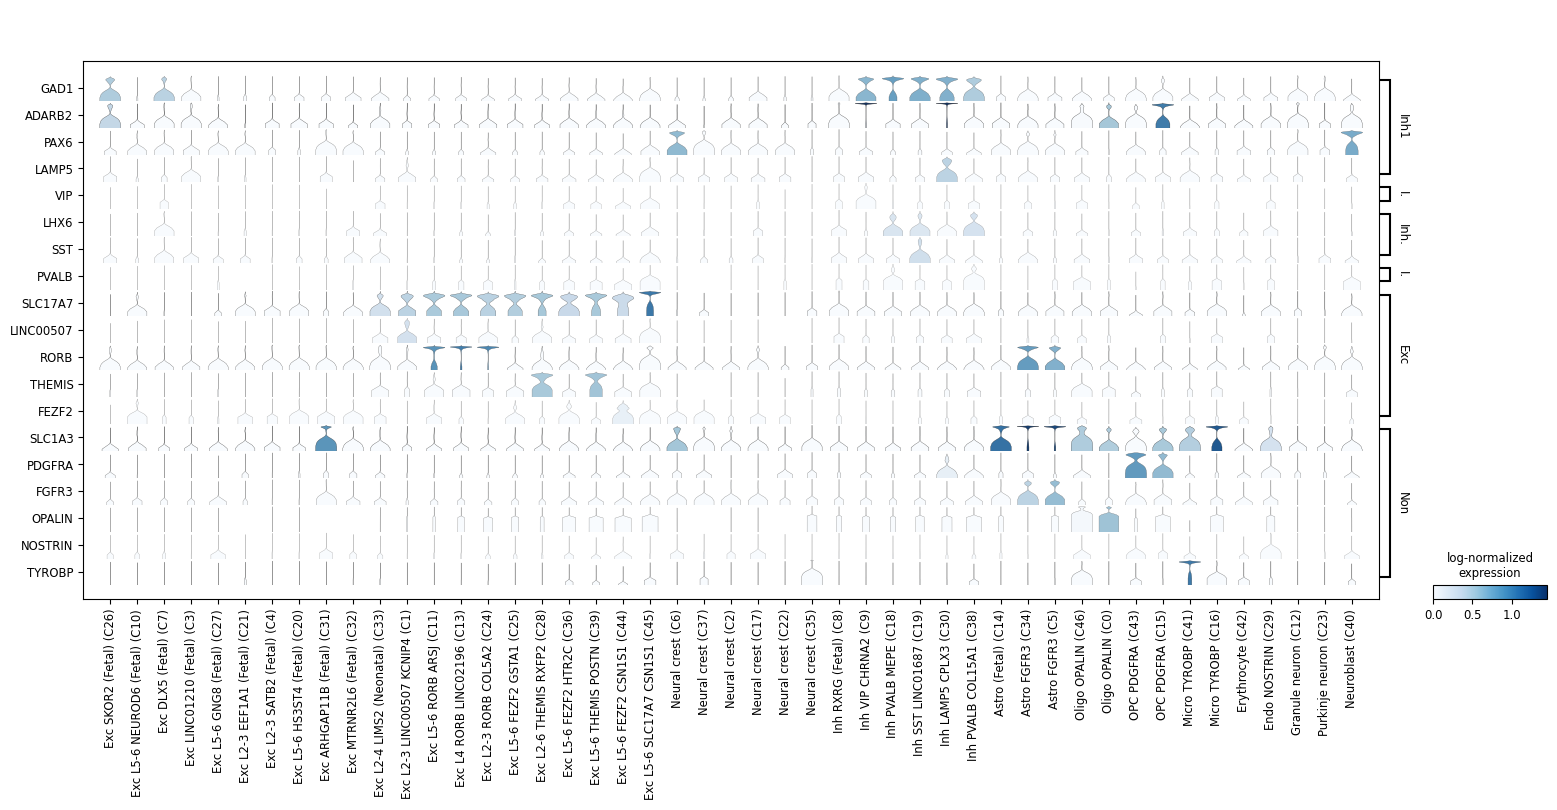

In [19]:
sc.pl.stacked_violin(adata, marker_genes_dict, groupby='leiden', log = True, colorbar_title='log-normalized\nexpression', swap_axes= True, categories_order = categories);

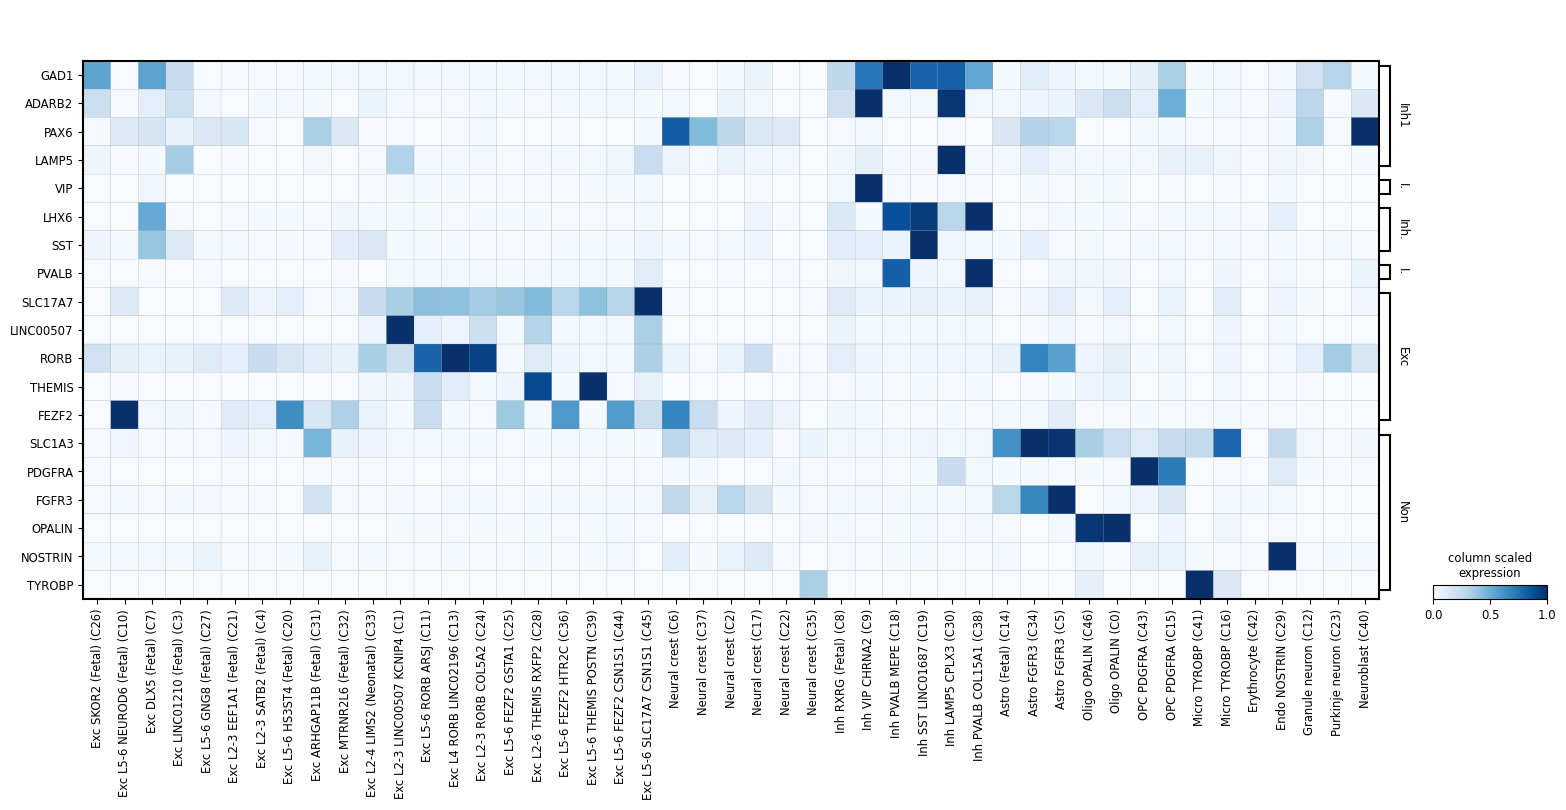

In [21]:
sc.pl.matrixplot(adata, marker_genes_dict, groupby='leiden', dendrogram=False, cmap='Blues', standard_scale='var', colorbar_title='column scaled\nexpression', swap_axes= True, categories_order = categories)

## Sex hormones

In [13]:
marker_genes = ['ESR1', 'ESR2', 'PTPRD']

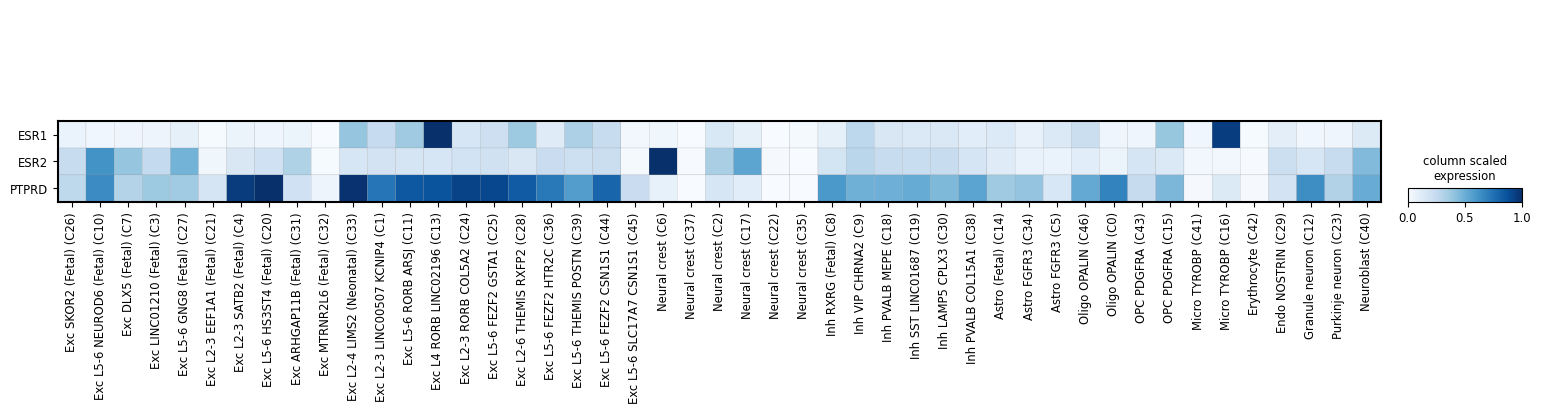

In [17]:
sc.pl.matrixplot(adata, marker_genes, groupby='leiden', dendrogram=False, cmap='Blues', 
                 standard_scale='var', colorbar_title='column scaled\nexpression', swap_axes= True, categories_order = categories,
                 save = 'matrixplot_SexHormone.pdf')

/home/ssun1116/anaconda3/envs/scanpy/lib/python3.8/site-packages/scanpy/plotting/_dotplot.py:749: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(x, y, **kwds)


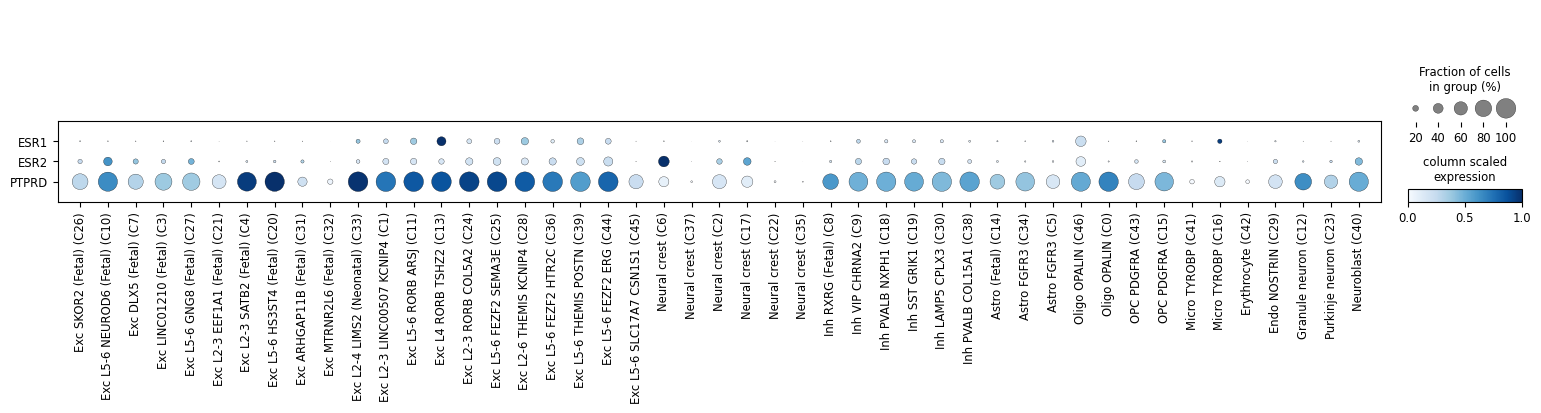

In [22]:
sc.pl.dotplot(adata, marker_genes, groupby = 'leiden', dendrogram = False, cmap = "Blues",
             standard_scale = 'var', colorbar_title='column scaled\nexpression', swap_axes= True, categories_order = categories,
             save = 'dotplot_SexHormone.pdf')

In [22]:
adata.obs[["data"]] = "1"

/home/ssun1116/anaconda3/envs/scanpy/lib/python3.8/site-packages/scanpy/plotting/_dotplot.py:749: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(x, y, **kwds)


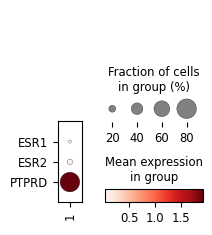

In [23]:
sc.pl.dotplot(adata, marker_genes, 'data', swap_axes= True, save = 'dotplot_SexHormone.pdf')

## lncRNA

In [27]:
adata.obs[["data"]] = "1"

In [28]:
marker_CRE1 = ['LINC02913', 'MEF2C-AS1', 'LINC01414', 'FOXG1-AS1', 'STARD4-AS1', 'MIR99AHG', 'LINC01923', 'LINC01500', 'LINC00384', 'ID2-AS1'] ## CRE L2/3
marker_CRE2 = ['LY86-AS1', 'FOXG1-AS1', 'NEURL1-AS1', 'MIR99AHG', 'LINC01500', 'LINC01122', 'TMC3-AS1', 'MYCNOS', 'SILC1', 'LINC02359'] ## CRE L4
marker_CRE3 = ['LINC01122', 'LINC02913', 'MEF2C-AS1', 'CASC15', 'LINC01923', 'LINC01500', 'MIR99AHG', 'FOXG1-AS1', 'LINC00686', 'MYCNOS'] ## CRE L5/6

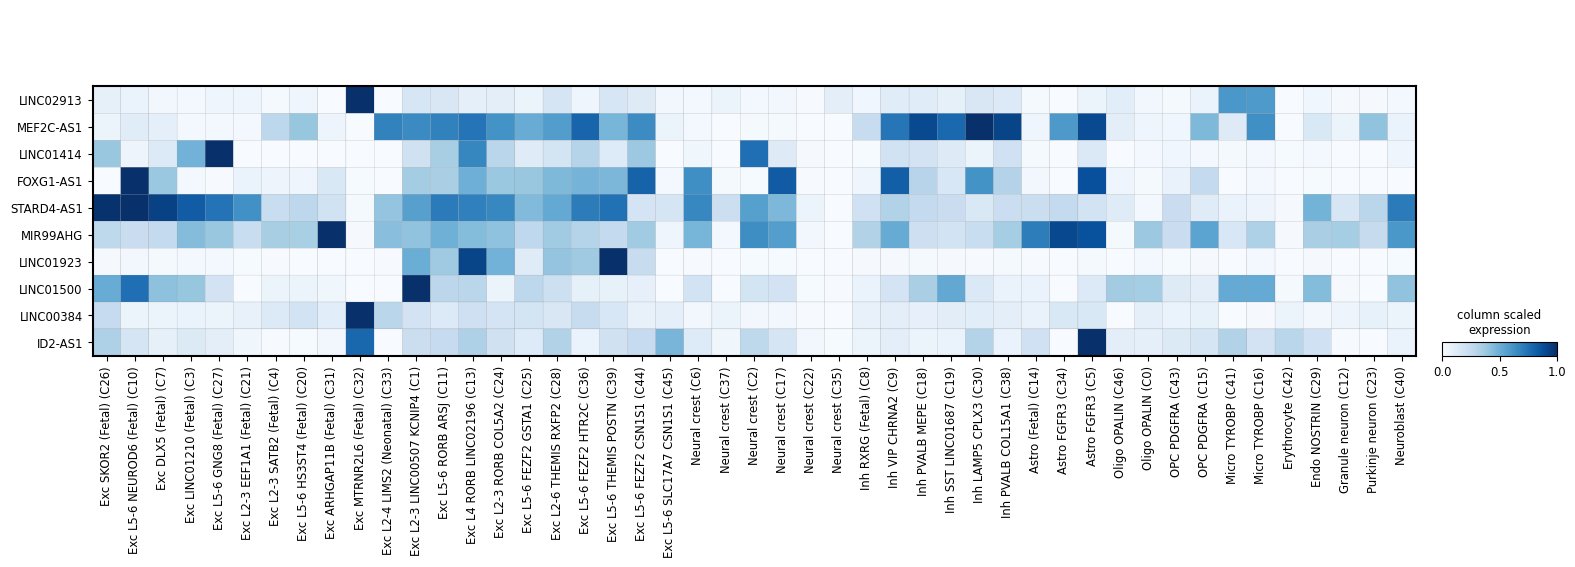

In [32]:
sc.pl.matrixplot(adata, marker_CRE1, groupby='leiden', dendrogram=False, cmap='Blues', 
standard_scale='var', colorbar_title='column scaled\nexpression', swap_axes= True, categories_order = categories, 
save = 'matrixplot_CRE1.pdf')

/home/ssun1116/anaconda3/envs/scanpy/lib/python3.8/site-packages/scanpy/plotting/_dotplot.py:749: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(x, y, **kwds)


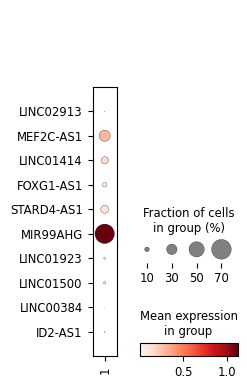

In [38]:
sc.pl.dotplot(adata, marker_CRE1, 'data', swap_axes= True, save = 'dotplot_CRE1.pdf')

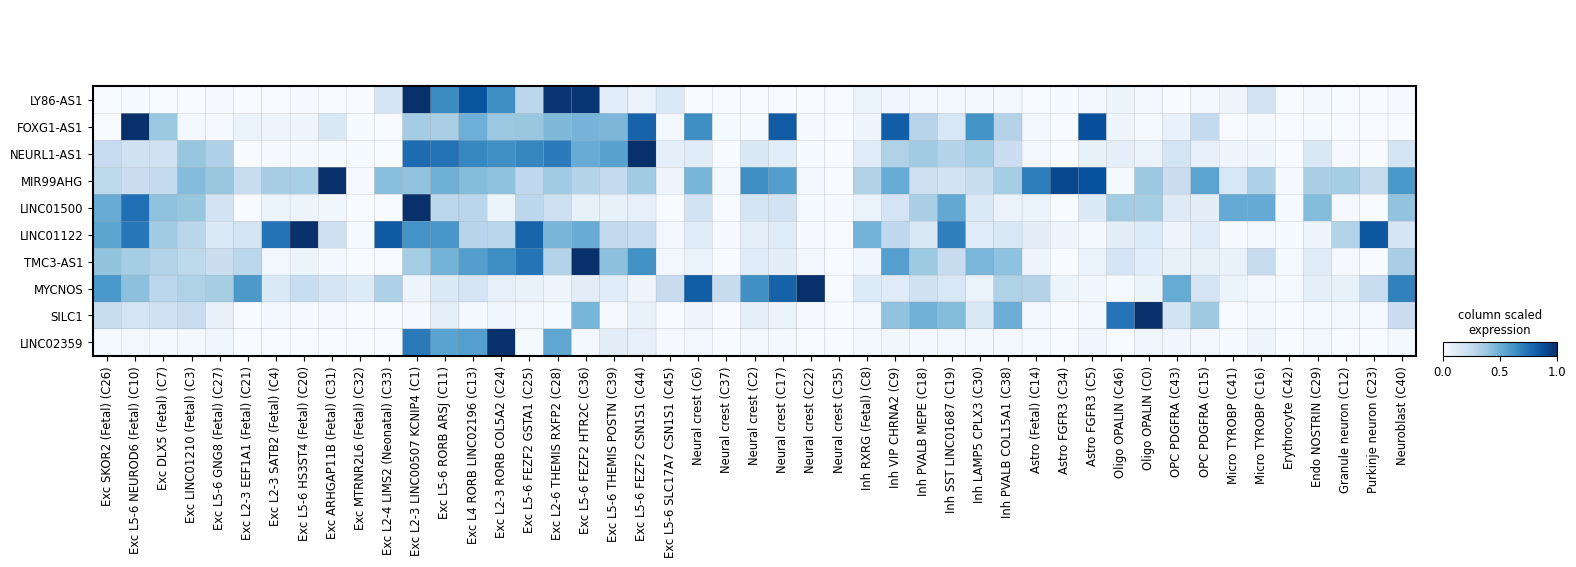

In [34]:
sc.pl.matrixplot(adata, marker_CRE2, groupby='leiden', dendrogram=False, cmap='Blues', 
standard_scale='var', colorbar_title='column scaled\nexpression', swap_axes= True, categories_order = categories,
save = 'matrixplot_CRE2.pdf')

/home/ssun1116/anaconda3/envs/scanpy/lib/python3.8/site-packages/scanpy/plotting/_dotplot.py:749: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(x, y, **kwds)


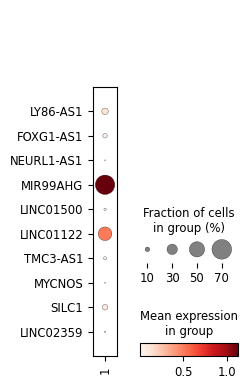

In [39]:
sc.pl.dotplot(adata, marker_CRE2, 'data', swap_axes= True, save = 'dotplot_CRE2.pdf')

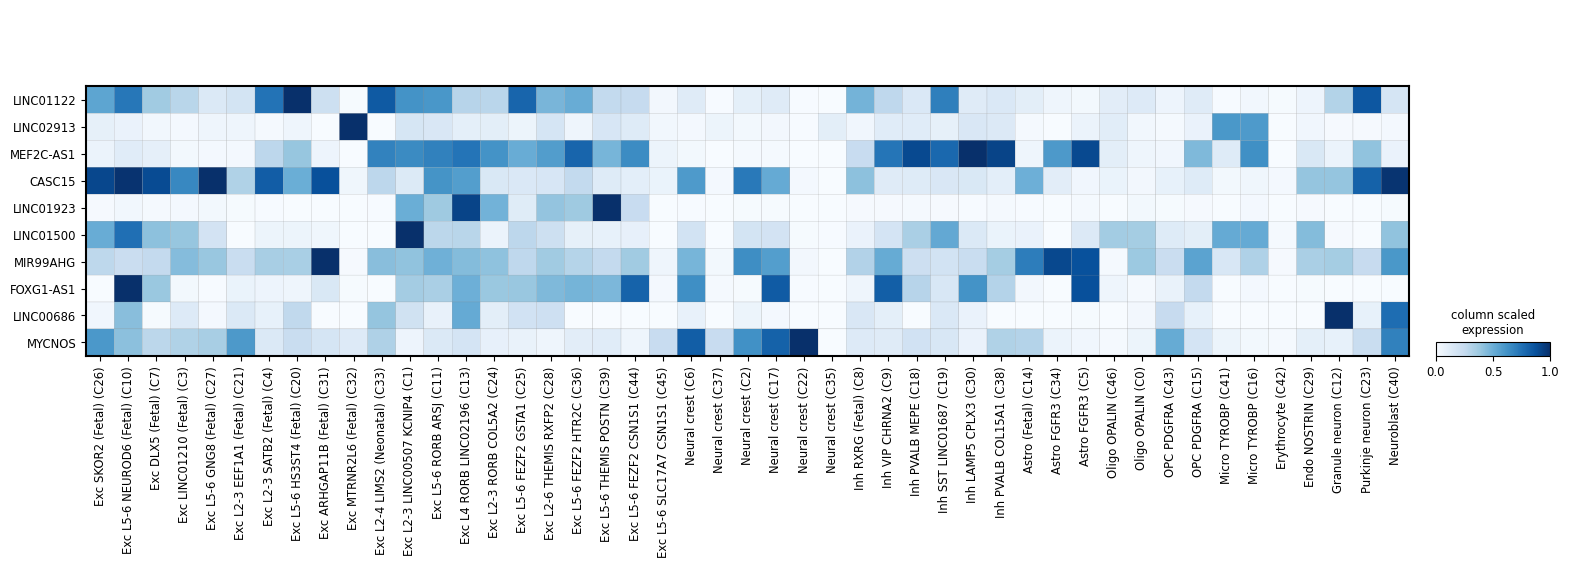

In [36]:
sc.pl.matrixplot(adata, marker_CRE3, groupby='leiden', dendrogram=False, cmap='Blues', 
standard_scale='var', colorbar_title='column scaled\nexpression', swap_axes= True, categories_order = categories,
save = 'matrixplot_CRE3.pdf')

/home/ssun1116/anaconda3/envs/scanpy/lib/python3.8/site-packages/scanpy/plotting/_dotplot.py:749: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(x, y, **kwds)


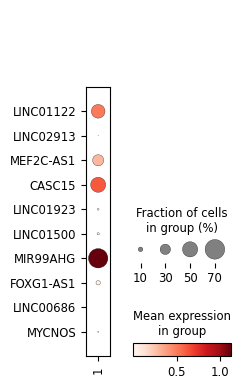

In [40]:
sc.pl.dotplot(adata, marker_CRE3, 'data', swap_axes= True, save = 'dotplot_CRE3.pdf')

## GJ cells

In [21]:
adata.obs[["data"]] = "1"
markers = ['GJB1','GJD2','GJA1','GJE1','GJA4','GJA5','GJD4','GJC2','GJA8','GJB3','GJA3','GJB4','GJC3','GJD3','GJB5','GJB7','GJB6','GJA10','GJB2'] 

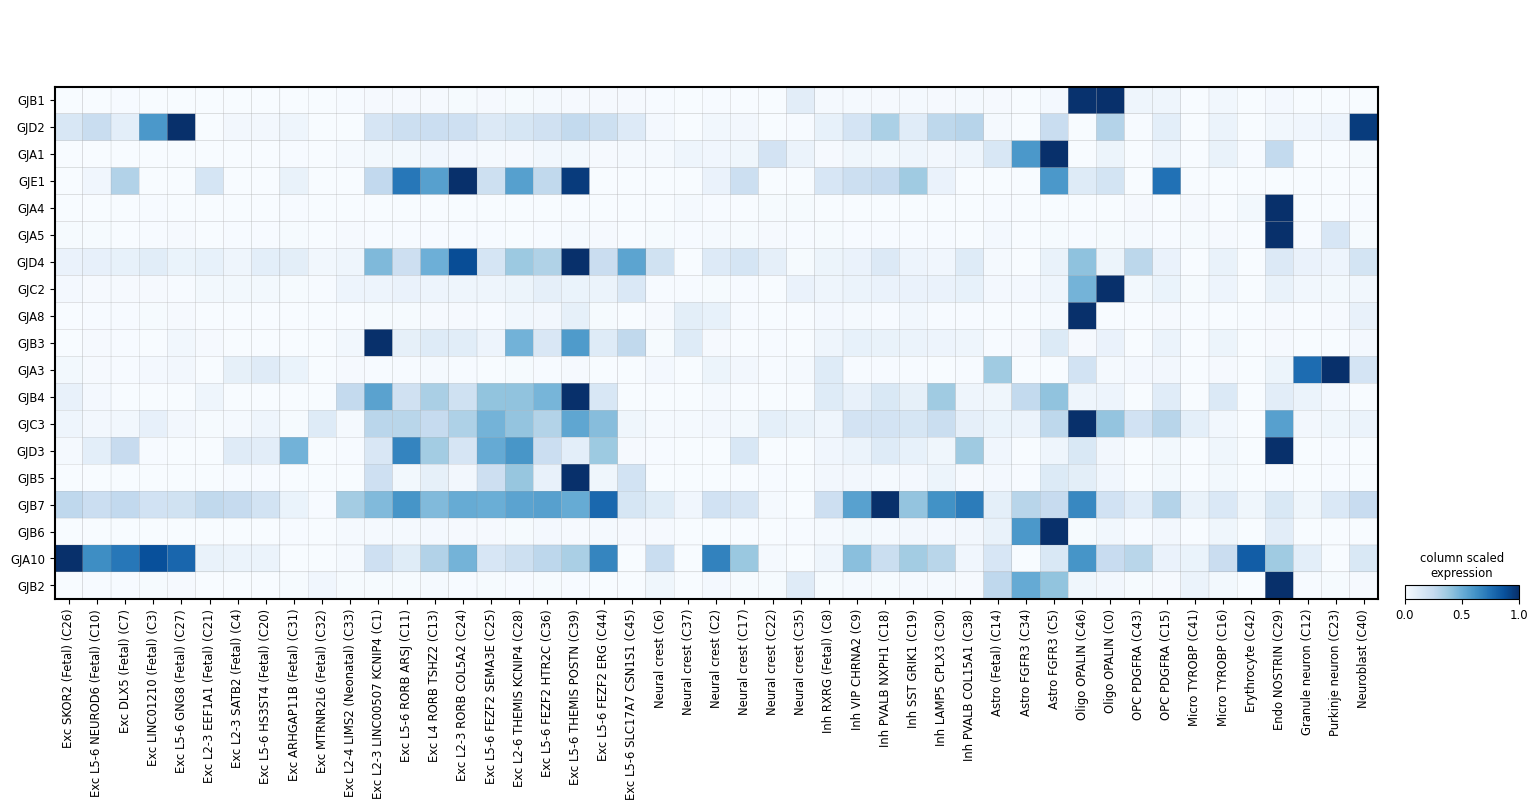

In [22]:
sc.pl.matrixplot(adata, markers, groupby='leiden', dendrogram=False, cmap='Blues', 
standard_scale='var', colorbar_title='column scaled\nexpression', swap_axes= True, categories_order = categories, 
save = 'matrixplot_GJ.pdf')

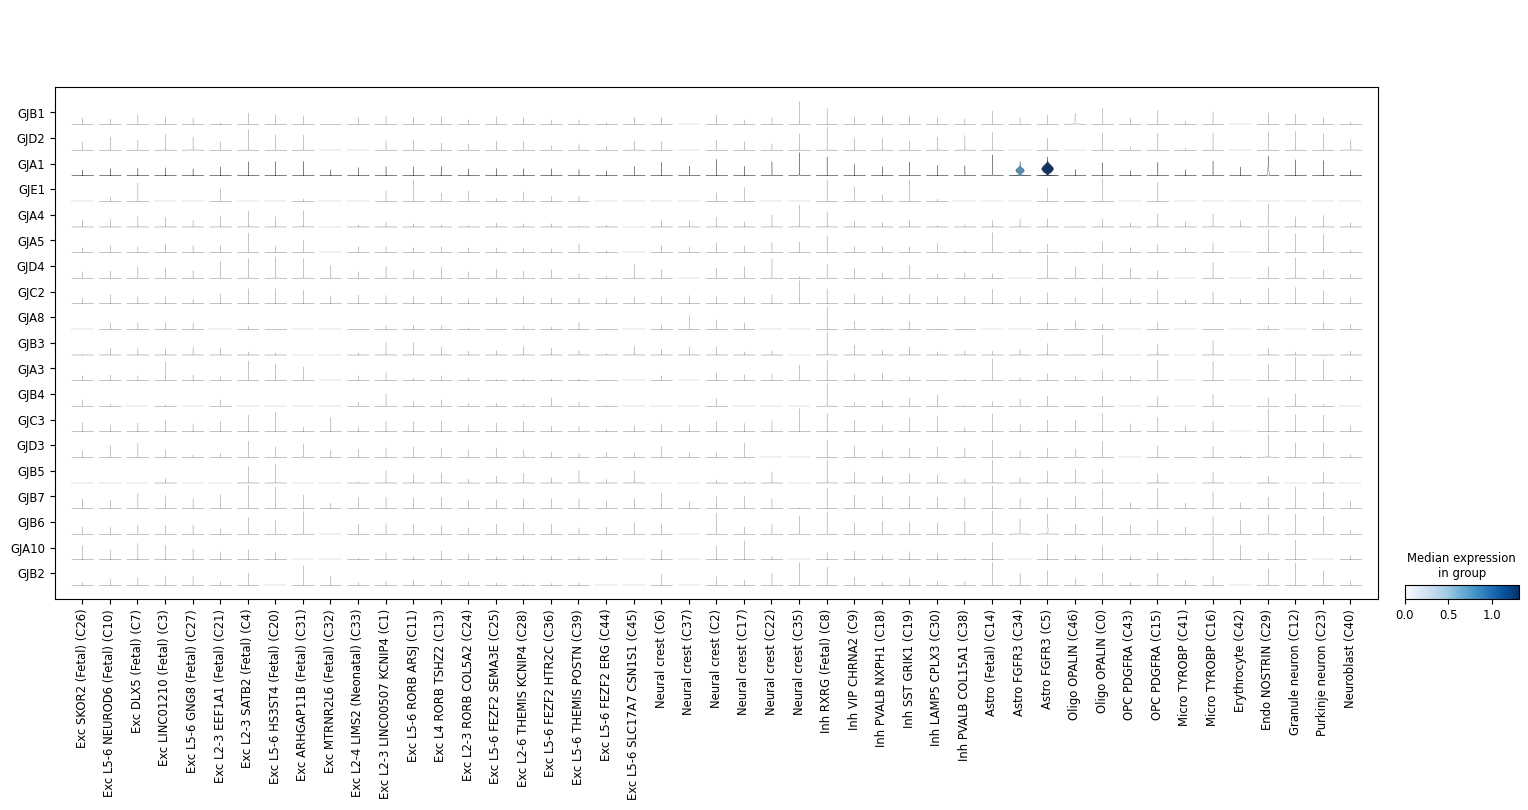

In [25]:
ax = sc.pl.stacked_violin(adata, markers, groupby='leiden', swap_axes= True, use_raw = True, categories_order = categories)

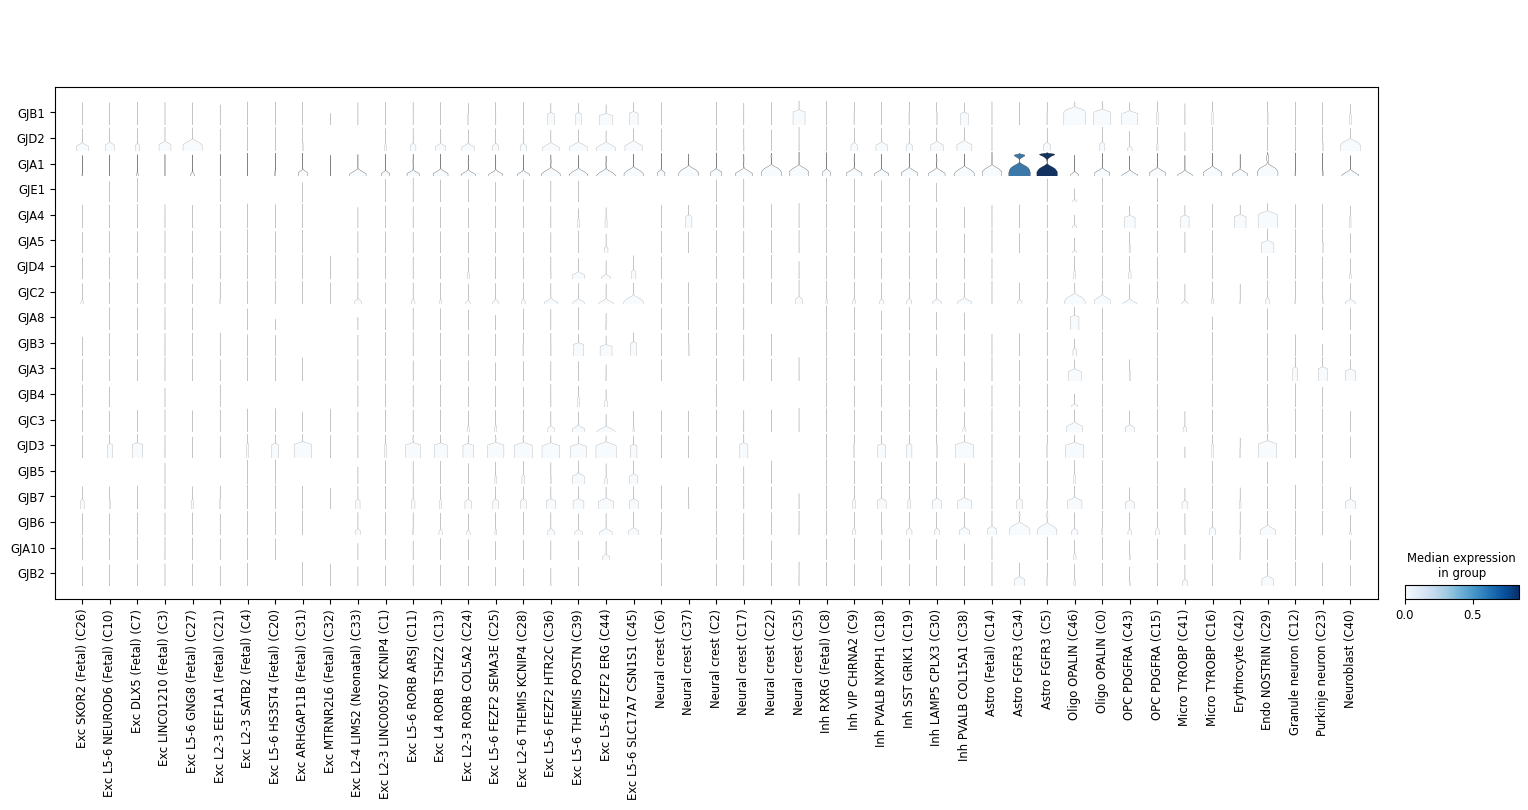

In [27]:
ax = sc.pl.stacked_violin(adata, markers, groupby='leiden', log = True, swap_axes= True, use_raw = True, categories_order = categories)

/home/ssun1116/anaconda3/envs/scanpy/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


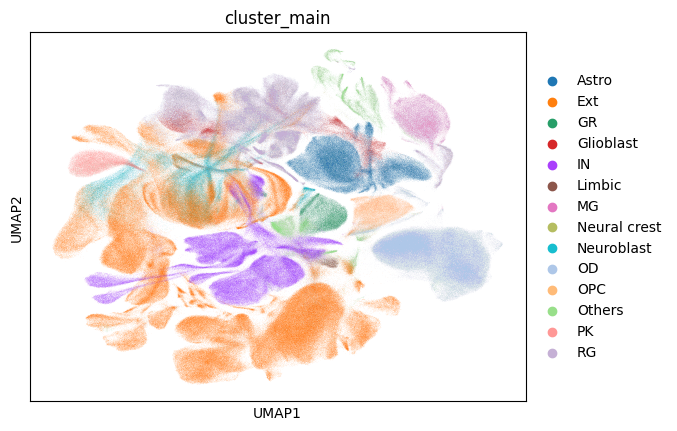

In [35]:
sc.pl.umap(adata, color = "cluster_main")

In [33]:
adata.obs

,batch,sampleID,Age,Assay,Stage,Race,PMI,Hemisphere,Library,Brain_Region,...,Diagnosis,DF_classification,cluster_original,cluster_main,n_genes,_scvi_batch,_scvi_labels,leiden,_scvi_raw_norm_scaling,data
F2S4_160113_027_A01,Unknown,H200.1025,18615.0,SMART-Seq v4,Adult,Caucasian,Unknown,L,snRNA,MTG,...,nan,nan,nan,Others,6360,1,0,Inh SST GRIK1 (C19),0.023359,1
F2S4_160113_027_B01,Unknown,H200.1025,18615.0,SMART-Seq v4,Adult,Caucasian,Unknown,L,snRNA,MTG,...,nan,nan,VIP,IN,7382,1,0,Inh VIP CHRNA2 (C9),0.018881,1
F2S4_160113_027_C01,Unknown,H200.1025,18615.0,SMART-Seq v4,Adult,Caucasian,Unknown,L,snRNA,MTG,...,nan,nan,LAMP5,IN,8147,1,0,Inh LAMP5 CPLX3 (C30),0.017079,1
F2S4_160113_027_D01,Unknown,H200.1025,18615.0,SMART-Seq v4,Adult,Caucasian,Unknown,L,snRNA,MTG,...,nan,nan,LAMP5,IN,7520,1,0,Inh VIP CHRNA2 (C9),0.023847,1
F2S4_160113_027_E01,Unknown,H200.1025,18615.0,SMART-Seq v4,Adult,Caucasian,Unknown,L,snRNA,MTG,...,nan,nan,VIP,IN,8744,1,0,Inh VIP CHRNA2 (C9),0.016129,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
hsDG208PD_TTTGTTGGTCGCGTCA-1,Unknown,hsDG208PD,28470.0,10x Chromium 3' v3,Adult,Unknown,Unknown,A,snRNA,BA9,...,PD,nan,INH2,IN,2040,12,0,Inh PVALB NXPH1 (C18),7.267442,1
hsDG208PD_TTTGTTGGTGAACGGT-1,Unknown,hsDG208PD,28470.0,10x Chromium 3' v3,Adult,Unknown,Unknown,A,snRNA,BA9,...,PD,nan,OPC1,OPC,4766,12,0,OPC PDGFRA (C15),1.848087,1
hsDG208PD_TTTGTTGGTGTTGATC-1,Unknown,hsDG208PD,28470.0,10x Chromium 3' v3,Adult,Unknown,Unknown,A,snRNA,BA9,...,PD,nan,INH1,IN,6263,12,0,Inh VIP CHRNA2 (C9),1.241311,1
hsDG208PD_TTTGTTGTCATCGGGC-1,Unknown,hsDG208PD,28470.0,10x Chromium 3' v3,Adult,Unknown,Unknown,A,snRNA,BA9,...,PD,nan,EX1,Ext,2542,12,0,Exc L2-3 LINC00507 KCNIP4 (C1),5.640158,1


/home/ssun1116/anaconda3/envs/scanpy/lib/python3.8/site-packages/scanpy/plotting/_dotplot.py:749: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(x, y, **kwds)


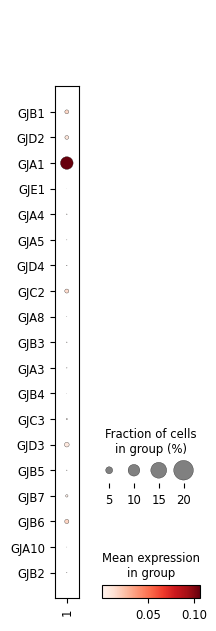

In [24]:
sc.pl.dotplot(adata, markers, 'data', swap_axes= True, save = 'dotplot_GJ.pdf')

### Original codes.

In [7]:
marker_genes = ['ESR1', 'ESR2', 'PTPRD']

In [10]:
np.min(adata.layers['scaled'])

-0.5706501

In [ ]:
sc.pl.matrixplot(adata, markers, groupby='leiden', dendrogram=False, cmap='Blues', 
standard_scale='var', colorbar_title='column scaled\nexpression', swap_axes= True, categories_order = categories, 
save = 'matrixplot_GJ.pdf')

AttributeError: PathCollection.set() got an unexpected keyword argument 'standard_scale'

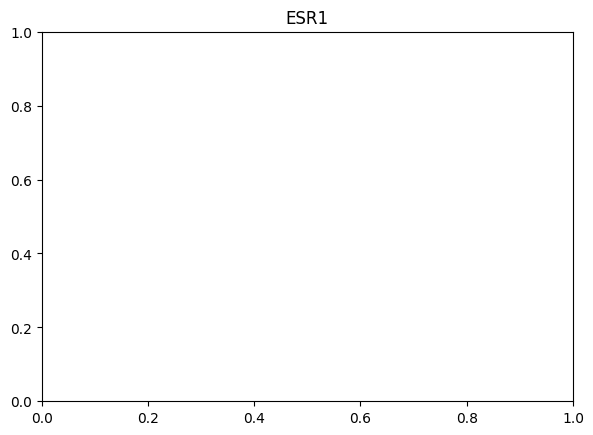

In [21]:
sc.pl.umap(adata, standard_scale='var', color= marker_genes, cmap='bwr', vmin = 0, vmax = 0.5)

In [ ]:
adata.write('/home/sonic/scData/anndata/Output_230331_scVI_hgv_5000_outer_minGenes_50.AllGenes_20230630.h5ad')

In [ ]:
# https://www.color-hex.com/color-names.html
col_dict_leiden = {
    # Clade 1-1 (cereberum or celebellum)
    '4': '#ff9f00', # Fetal, L2-3 CUX2, L4 RORB (Cerebrum)
    '20': '#ff9f00', # Fetal, L5-6 TLE4 (Cerebrum)
    
    '23': '#fe6f5e', # Purkanje
    '8': '#702963', # Cerebrum (IN but also Ext, Limbic, Others -> further clustering)
    '12': '#b0bf1a', # GR, Interneuron, UniBrush 포함
    
    # Clade 1-2-1
    '15': '#ff91af', # OPC
    '9': '#702963', # Adult, BA9
    '30': '#702963', # Adult, BA24, BA4, BA9, BA21 ? Why it's outward?
    
    '19': '#702963', # Adult, BA24, BA4, BA9, BA21
    '18': '#702963', # Adult, BA24, BA4, BA9, BA21
    '38': '#702963', # Adult, BA9
    
    # Clade 1-2-2
    '36': '#ff9f00', # Adult, L5-6 TLE4, NP from 20 (BA4 + BA9) (L5/6 TLE4 mature?)
    '33': '#ff9f00', # Fetal, L2-3 CUX2, L4 RORB from 4 (L2-3 immature?)
    
    '25': '#ff9f00', # Adult, L5-6 TLE4 from 20 (BA4 + BA9) (L5/6 TLE4 mature?)
    '11': '#ff9f00', # Adult, L5 IT; RORB
    '44': '#ff9f00', # Adult, L5 ET (BA4 + BA9)
    
    '13': '#ff9f00', # Adult, L4 RORB; RORB 
    '24': '#ff9f00', # Adult, L2/3 IT; RORB
    
    '1': '#ff9f00', # Adult, L2-4 from 33 and 4
    '28': '#ff9f00', # Adult, L2-4, 5-6
    '39': '#ff9f00', # Adult, L5-6 THEMIS, IT Car3
    
    ###
    
    # Clade 2-1
    '0': '#a3c1ad', # Adult, OD
    '46': '#a3c1ad', # OD, with Microglia
    
    '5': '#0048ba', # Late adult, Astro
    '34': '#0048ba', # Neonatal, Astro
    
    '14': '#0048ba', # Fetal Astro인데, 31번 Ext와 같이 나옴 (Glioblast 포함)
    '31': '#ff9f00', # Cerebrum
    
    # Clade 2-2-1-1 
    '10': '#ff9f00',# Neuroblast 40% (Cortex) (L5/6 TLE4 immature?)
    '40': '#e63e62', # Fetal, Neuroblast (L5/6 TLE4 immature?)
    
    '27': '#ff9f00',# Fetal, Neuroblast 20%, Neuro Crest 3% (Diencephalon, Thalamus and Pons) (L5/6 TLE4 immature?)
    '7': '#ff9f00', # Fetal, Mostly cortex but GE

    '3': '#ff9f00', # Fetal, Neuroblast 30% (Mix of Midbrain, Forebrain, Hindbrain)
    '26': '#ff9f00', # Fetal, Neuroblast 20% (Cerebellum)  

    # Clade 2-2-1-2 (New neuron)
    '43': '#ff91af', # 초기 나이의 OD로 잡히지만, 사실 OPC? 그런데 왜 Ext clade에서?
    '21': '#ff9f00', # Fetal, Trevino, Cortex
    '32': '#ff9f00', # Fetal, Eze, Striatum
    
    '22': '#458b74', # Neural crest,  Ext Clade 1과 묶임
    '37': '#458b74', # Neural crest,  Ext Clade 1과 묶임    
    
    '2': '#458b74', # Neural crest, Ext Clade 1과 묶임
    '6': '#458b74', # Neural crest,  Ext Clade 1과 묶임
    '17': '#2f847c', # Striatum,  Ext Clade 1과 묶임
    
    # Clade 2-2-2 (MG)
    '45': '#ff9f00', # L5 (BA9 only) 왜인지 모르겠지만, MG랑 비슷하게 나오는것
    '16': '#fdee00', # Adult, MG
    
    '35': '#458b74', # Astro 혹은 MG로 가는 RG, Fetal에 해당
    '42': '#bfff00', # fetal only, Erythrocyte
    
    '29': '#bfff00', # from fetal to adult, Vascular or endothelial, MG와 같은 clade
    '41': '#fdee00', # Fetal
}

In [ ]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [ ]:
pd.crosstab(adata.obs['cluster_original'], adata.obs['leiden'])